In [46]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_noLabel.csv')


In [48]:
# 描述性统计
print(train.describe())

                ID          Age  DistanceFromHome    Education  \
count  1100.000000  1100.000000       1100.000000  1100.000000   
mean    549.500000    36.999091          9.427273     2.922727   
std     317.686953     9.037230          8.196694     1.022242   
min       0.000000    18.000000          1.000000     1.000000   
25%     274.750000    30.000000          2.000000     2.000000   
50%     549.500000    36.000000          7.000000     3.000000   
75%     824.250000    43.000000         15.000000     4.000000   
max    1099.000000    60.000000         29.000000     5.000000   

       EmployeeNumber  EnvironmentSatisfaction  JobInvolvement     JobLevel  \
count     1100.000000              1100.000000     1100.000000  1100.000000   
mean      1028.157273                 2.725455        2.730909     2.054545   
std        598.915204                 1.098053        0.706366     1.107805   
min          1.000000                 1.000000        1.000000     1.000000   
25%       

In [49]:
# Age 的最小值是 18, 去掉最小值, StandardHours 方差为 0,
train.drop(['StandardHours','Over18'],axis=1,inplace=True)
test.drop(['StandardHours','Over18'],axis=1,inplace=True)

In [50]:
train.head()

,ID,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Label
0,0,37,Travel_Rarely,Research & Development,1,4,Life Sciences,77,1,Male,2,2,Manufacturing Director,3,Divorced,5993,1,No,18,3,3,1,7,2,4,7,5,0,7,0
1,1,54,Travel_Frequently,Research & Development,1,4,Life Sciences,1245,4,Female,3,3,Manufacturing Director,3,Divorced,10502,7,No,17,3,1,1,33,2,1,5,4,1,4,0
2,2,34,Travel_Frequently,Research & Development,7,3,Life Sciences,147,1,Male,1,2,Laboratory Technician,3,Single,6074,1,Yes,24,4,4,0,9,3,3,9,7,0,6,1
3,3,39,Travel_Rarely,Research & Development,1,1,Life Sciences,1026,4,Female,2,4,Manufacturing Director,4,Married,12742,1,No,16,3,3,1,21,3,3,21,6,11,8,0
4,4,28,Travel_Frequently,Research & Development,1,3,Medical,1111,1,Male,2,1,Laboratory Technician,2,Divorced,2596,1,No,15,3,1,2,1,2,3,1,0,0,0,1


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        1100 non-null   int64 
 1   Age                       1100 non-null   int64 
 2   BusinessTravel            1100 non-null   object
 3   Department                1100 non-null   object
 4   DistanceFromHome          1100 non-null   int64 
 5   Education                 1100 non-null   int64 
 6   EducationField            1100 non-null   object
 7   EmployeeNumber            1100 non-null   int64 
 8   EnvironmentSatisfaction   1100 non-null   int64 
 9   Gender                    1100 non-null   object
 10  JobInvolvement            1100 non-null   int64 
 11  JobLevel                  1100 non-null   int64 
 12  JobRole                   1100 non-null   object
 13  JobSatisfaction           1100 non-null   int64 
 14  MaritalStatus           

<AxesSubplot:>

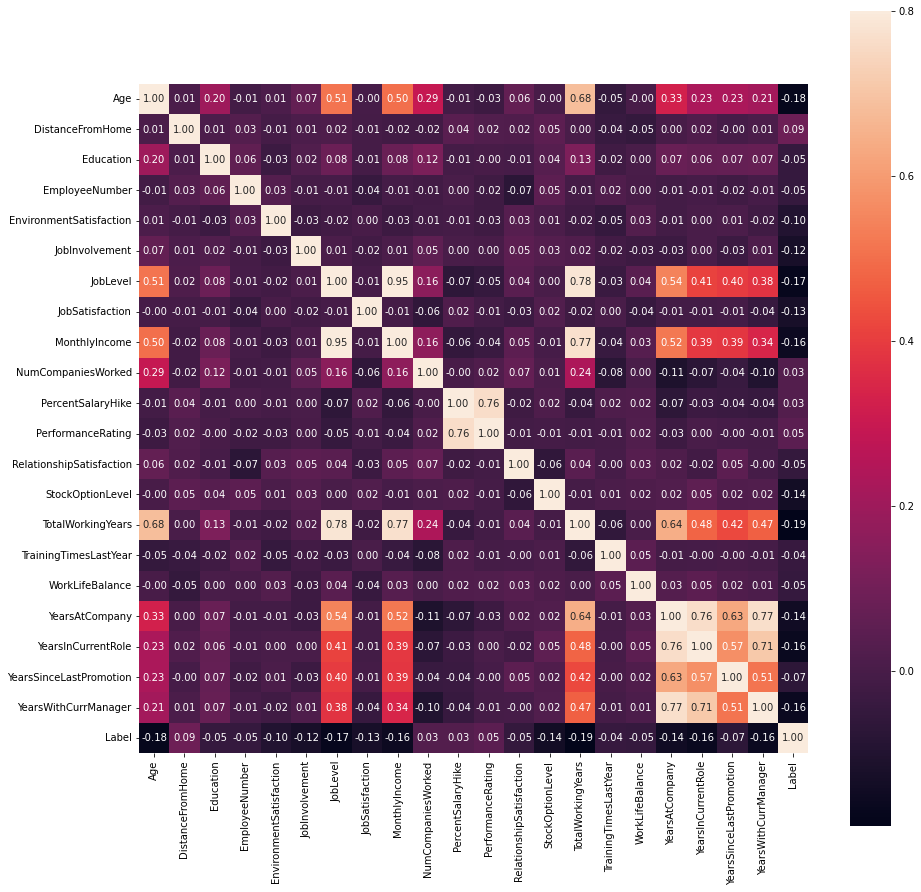

In [52]:
columns = train.columns.drop('ID')
correlation = train[columns].corr()
plt.figure(figsize=(15, 15)) 
sns.heatmap(correlation,square = True, annot=True, fmt='0.2f',vmax=0.8)


In [53]:
train.drop(['MonthlyIncome'],axis=1,inplace=True)
test.drop(['MonthlyIncome'],axis=1,inplace=True)

In [54]:
def fea_creat(df):
    df['Satisfaction'] = df['JobSatisfaction'] + df['EnvironmentSatisfaction'] + df['RelationshipSatisfaction']
fea_creat(train)
fea_creat(test)

In [55]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [56]:
train.drop(['EmployeeNumber'],axis=1,inplace=True)
test.drop(['EmployeeNumber'],axis=1,inplace=True)

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_train = train.drop(['ID','Label'],axis=1)
df_test = test.drop('ID',axis=1)
train_scaled = scaler.fit_transform(df_train)
test_scaled = scaler.transform(df_test)
df_train.iloc[:,:] = train_scaled[:,:]
df_test.iloc[:,:] = test_scaled[:,:]
df_train = pd.concat([df_train,train['Label']],axis=1)

In [58]:
X_data = df_train.drop('Label',axis=1)
Y_data = df_train['Label']
X_test  = df_test

print('X train shape:',X_data.shape)
print('X test shape:',X_test.shape)

X train shape: (1100, 48)
X test shape: (350, 48)


In [59]:
# 多模型交叉验证
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

models = {
    'LR': LogisticRegression(solver='liblinear', penalty='l2', C=1),
    'SVM': SVC(C=1, gamma='auto'),
    'DT': DecisionTreeClassifier(),
    'RF' : RandomForestClassifier(n_estimators=100),
    'AdaBoost': AdaBoostClassifier(n_estimators=100),
    'GBDT': GradientBoostingClassifier(n_estimators=100),
    'XGB': xgb.XGBClassifier(max_depth=10,subsample=0.7,colsample_bytree=0.75,n_estimators=100),
    'LGB': lgb.LGBMClassifier(num_leaves=120,n_estimators = 100)
}

for k, clf in models.items():
    print("the model is {}".format(k))
    scores = cross_val_score(clf, X_data, Y_data, cv=10)
    print(scores)
    print("Mean accuracy is {}".format(np.mean(scores)))
    print("-" * 100)


the model is LR
[0.91818182 0.86363636 0.90909091 0.85454545 0.90909091 0.9
 0.86363636 0.85454545 0.85454545 0.87272727]
Mean accuracy is 0.8799999999999999
----------------------------------------------------------------------------------------------------
the model is SVM
[0.84545455 0.84545455 0.83636364 0.83636364 0.83636364 0.83636364
 0.83636364 0.83636364 0.83636364 0.83636364]
Mean accuracy is 0.8381818181818181
----------------------------------------------------------------------------------------------------
the model is DT
[0.80909091 0.84545455 0.81818182 0.74545455 0.86363636 0.78181818
 0.77272727 0.74545455 0.79090909 0.76363636]
Mean accuracy is 0.7936363636363637
----------------------------------------------------------------------------------------------------
the model is RF
[0.88181818 0.85454545 0.85454545 0.87272727 0.87272727 0.86363636
 0.84545455 0.86363636 0.86363636 0.85454545]
Mean accuracy is 0.8627272727272726
-------------------------------------------

In [60]:
clf = LogisticRegression(solver='liblinear', penalty='l2', C=1)
clf.fit(X_data, Y_data)
result = clf.predict(X_test)
file = pd.DataFrame()
file['ID'] = test.ID
file['Label'] = result
file.to_csv('sub.csv',index=False)